<a href="https://colab.research.google.com/github/ndcastillo/radio-mobile-channel/blob/main/MobileChannel_LTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Desvanecimiento a gran escala

In [ ]:
# Uso de unidades del sistema internacional
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.fftpack import fft, ifft

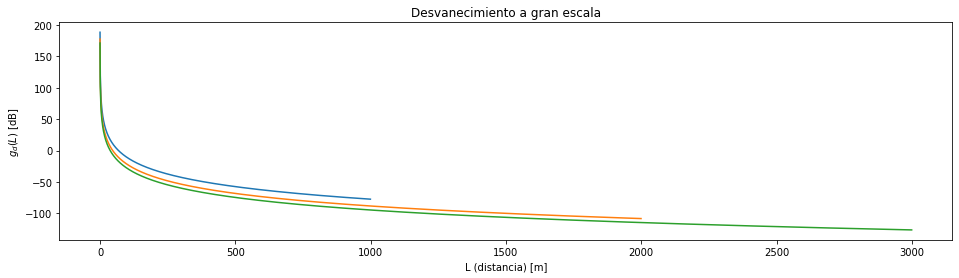

In [ ]:
c = 3e8 # Velocidad de la Luz
d = 2000 # Distancia de recorrido
f = 1e6 # Frecuencia
Pt = 33 # Potencia de Transmisión
gamma = 2 # Exponente

gd_db = []
plt.figure(figsize=(16,4))

def largeScale(d, f, Pt, gamma):
  L = np.arange(0.1,d,1) # Vector de muestras de longitud
  wave_length = (c/f) # determinacion de la longitud de onda
  gd = (((wave_length)/(4*math.pi*L))**2)*((10/L)**(gamma-2)) * Pt;
  gd_db = 10*(np.log(gd)/np.log(2)) 
  # plt.figure(figsize=(16,4))
  # plt.scatter(L,gd_db)
  # plt.plot(L,gd_db,'r')
  # plt.title('Perdida por espacio Libre')
  # plt.xlabel('L (distancia) [m]')
  # plt.ylabel('$g_d(L)$ [dB]')
  return [L, gd, gd_db]

[L, gd, gd_db] = largeScale(1000, 2e6, 33, 2)
plt.plot(L,gd_db)
[L, gd, gd_db] = largeScale(2000, 3e6, 35, 2)
plt.plot(L,gd_db)
[L, gd, gd_db] = largeScale(3000, 4e6, 40, 2)
plt.plot(L,gd_db)

plt.title('Desvanecimiento a gran escala')
plt.xlabel('L (distancia) [m]')
plt.ylabel('$g_d(L)$ [dB]')
plt.show()

### Evaluación del Canal con varianza temporal (Desvanecimiento Rayleigh)

Parametros de Evaluación

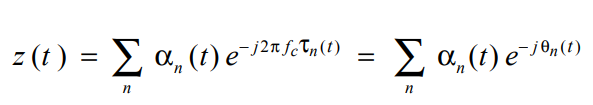

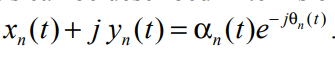

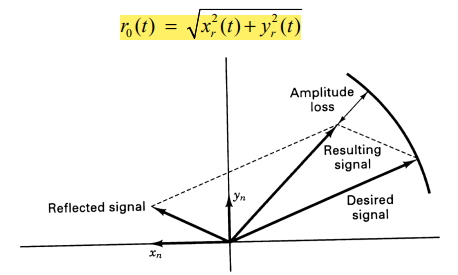

El maximo valor de desplazamiento en frecuencia esta dado por:
$$
f_d = \frac{v}{λ} = \frac{v*f_0}{c}
$$
donde $v$ es la velocidad relativa, $f_0$ la frecuencia de transmisión y $c$ la velocidad de la luz. 

In [ ]:
def ray(v,f0,N,title):
  Fs = 1e5 # sample rate
  fd = v*f0/3e8 # maximo desplazamiento doppler
  t = np.arange(0,1, 1/Fs) # vector de tiempo
  xr = np.zeros(len(t))
  yr = np.zeros(len(t))

  for i in range(N):
      deltafrecuency = (np.random.rand() - 0.5) * 2 * np.pi # cambio de frecuencia
      phi = (np.random.rand() - 0.5) * 2 * np.pi # generacion de un fase aleatorio
      xr = xr + np.random.randn() * np.cos(2 * np.pi * fd * t * np.cos(deltafrecuency) + phi) # Suma de componentes xr
      yr = yr + np.random.randn() * np.sin(2 * np.pi * fd * t * np.cos(deltafrecuency) + phi) # Suma de componentes yr

  # Se genera un psudovector utilizando numeros complejos
  r = (1/np.sqrt(N)) * (xr + 1j*yr) # Vector Resultante NORMALIZADO
  R = np.abs(r) # Magnitud del numero complejo
  R_dB = 10*np.log10(R) # Magnitud en dB

  # Grafica generada
  plt.plot(t, R_dB)
  plt.plot([0, 1], [0, 0], ':r') # 0 dB
  plt.legend(['Desvanecimiento Rayleigh', 'Sin desvanecimiento'])
  plt.title('(Dominio Temporal) v =' + title + ' [m/s]' + '; fd='+ str(round(fd,2))+'[Hz]')
  # plt.axis([0, 1, -15, 5])
  plt.xlabel('Tiempo (ms)')
  plt.ylabel('Pr (dB)')
  plt.show()

  plt.psd(R, NFFT=len(t), pad_to=len(t), Fs=4*f0, scale_by_freq=True)
  plt.title('Densidad Espectral de Potencia')
  # plt.axis([left, rigth, -430, -30])
  plt.show()

  rfft = fft(R)
  N = len(rfft)
  n = np.arange(N)
  # print(n)
  T = N/(10*f0)
  freq = n/T

  rfft_db = 10*np.log10(rfft)
  plt.plot(freq[0:100], np.abs(rfft_db)[0:100])
  plt.title('Densidad Espectral')
  plt.xlabel('Frecuencia (f)')
  plt.ylabel('Po')
  plt.show()

#### Velocidades Relativas

Cambiamos velocidades relativas, con frecuencia: 200MHz


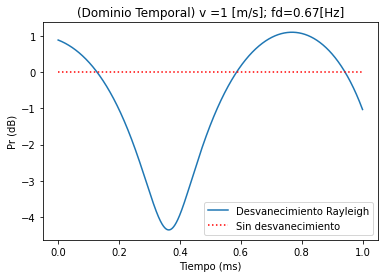

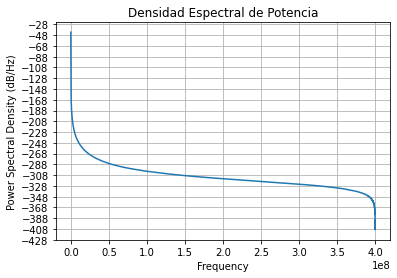

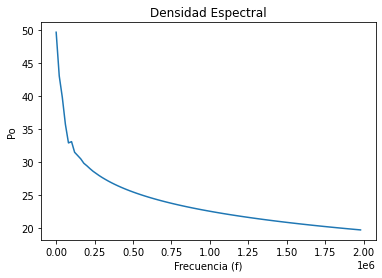

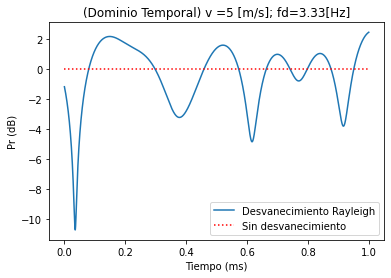

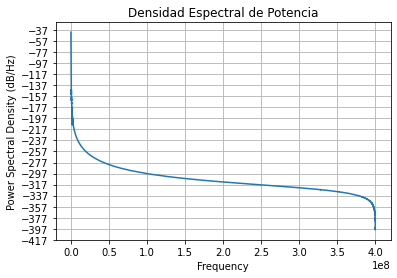

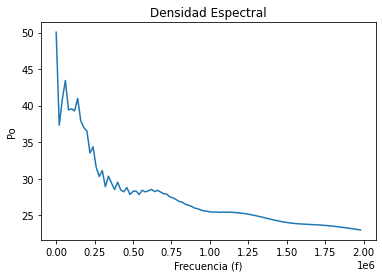

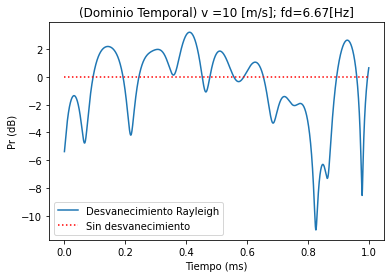

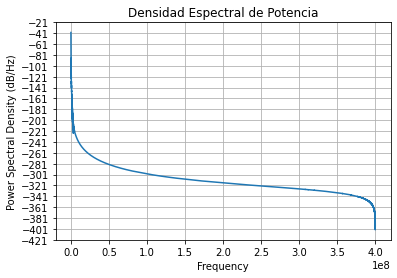

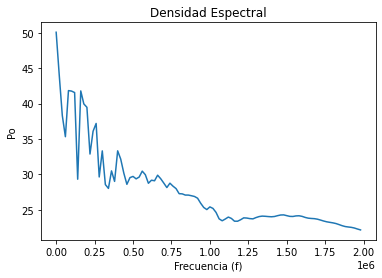

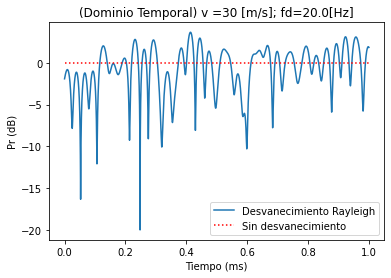

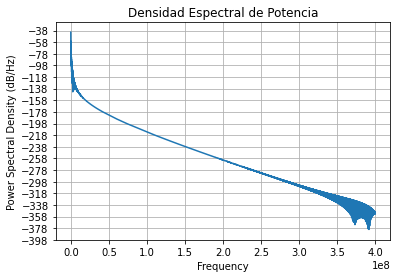

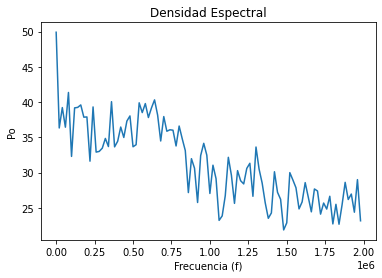

In [ ]:
# v,f0,N,title
print('Cambiamos velocidades relativas, con frecuencia: 200MHz')
ray(1,200e6,100,str(1));
ray(5,200e6,100,str(5));
ray(10,200e6,100,str(10));
ray(30,200e6,100,str(30));

#### Frecuencias de operación

Cambiamos la frecuencia de funcionamiento, con frecuencia: 2GHz


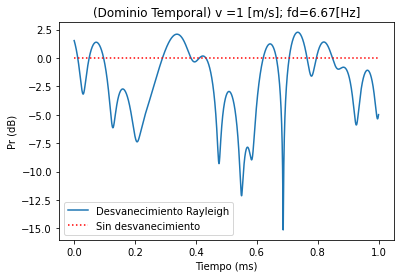

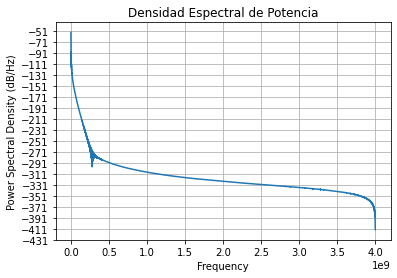

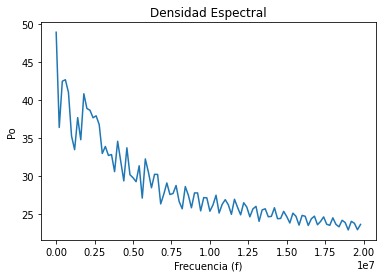

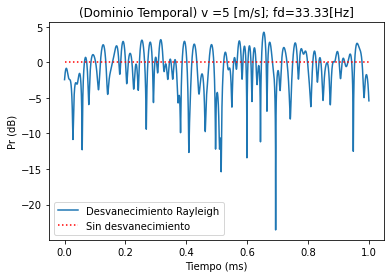

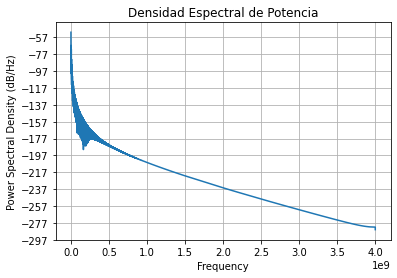

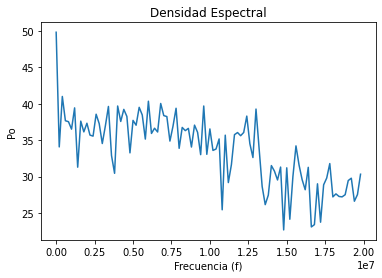

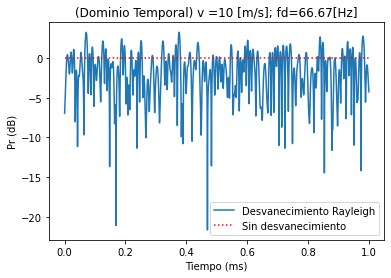

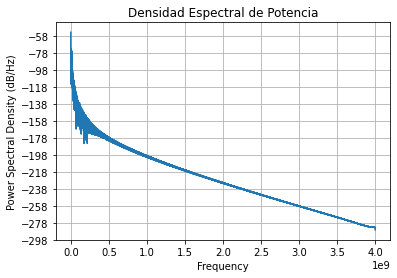

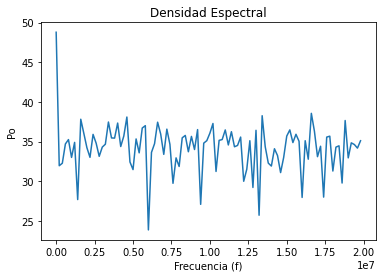

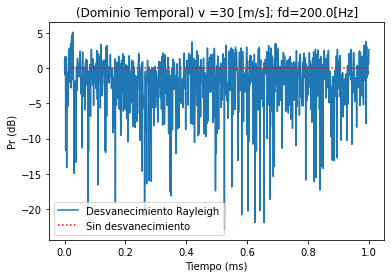

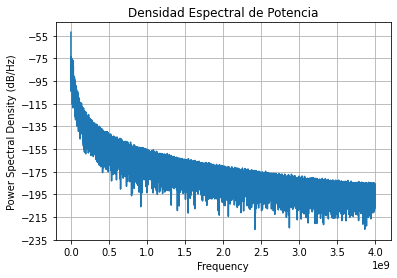

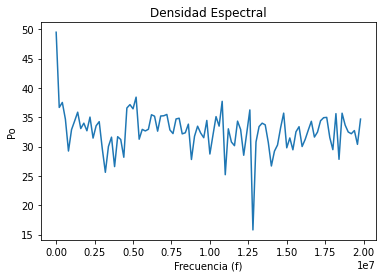

Cambiamos las copias multicamino, con frecuencia: 500Mhz


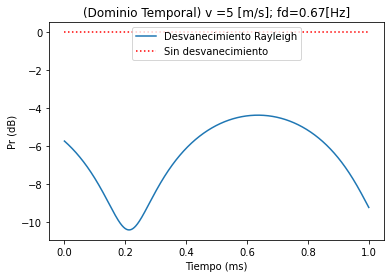

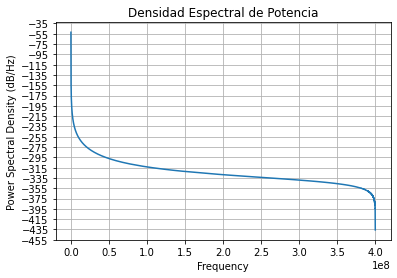

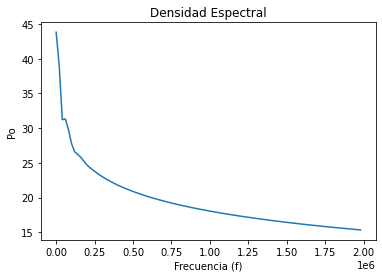

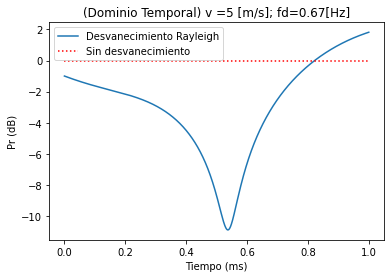

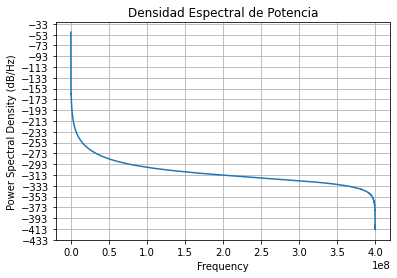

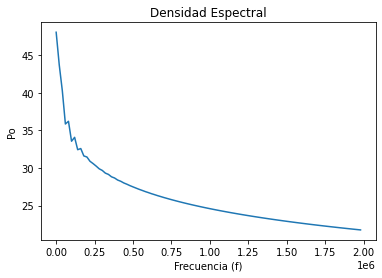

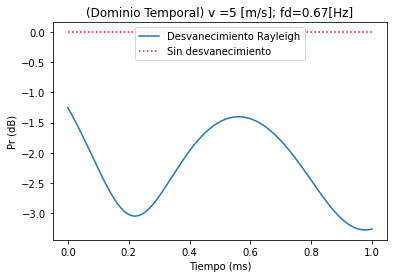

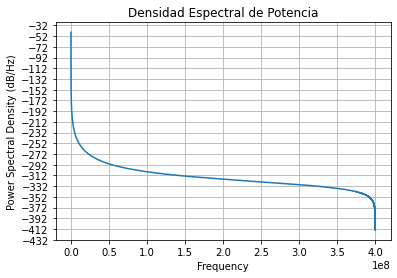

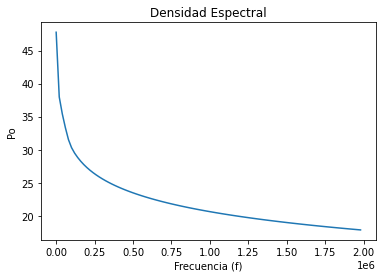

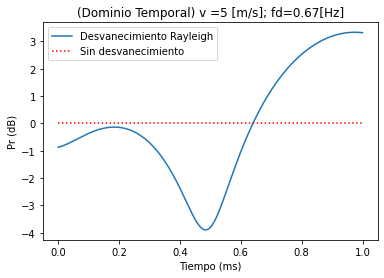

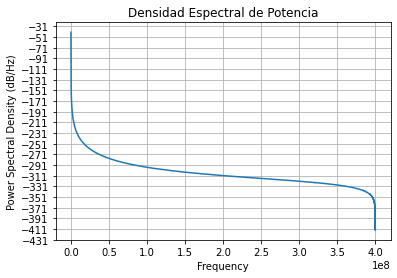

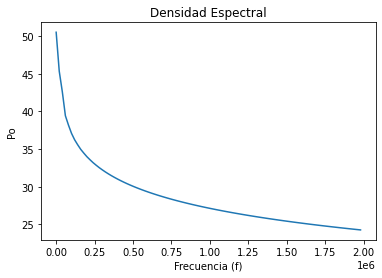

In [ ]:
print('Cambiamos la frecuencia de funcionamiento, con frecuencia: 2GHz')
ray(1,2e9,100,str(1));
ray(5,2e9,100,str(5));
ray(10,2e9,100,str(10));
ray(30,2e9,100,str(30));

Cambiamos las copias multicamino, con frecuencia: 500Mhz


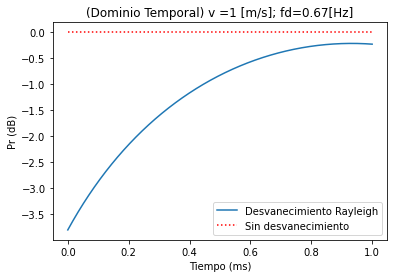

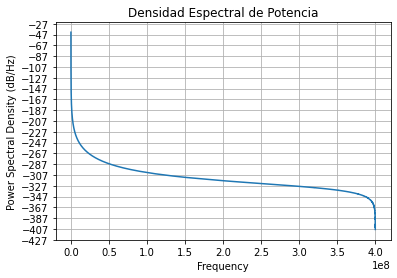

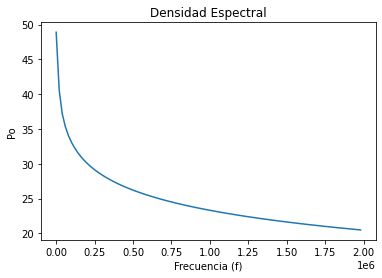

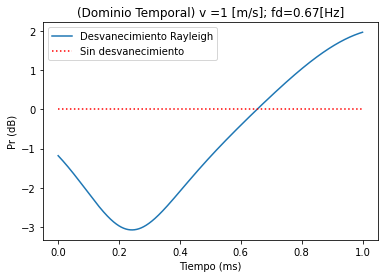

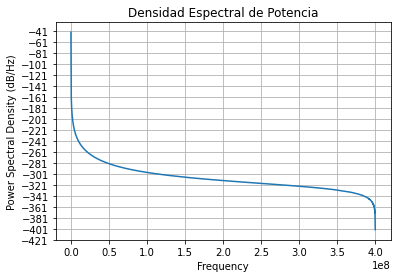

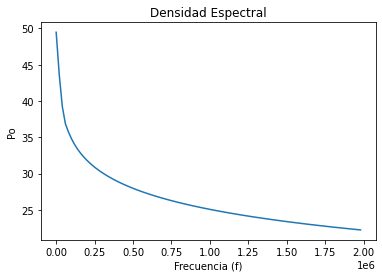

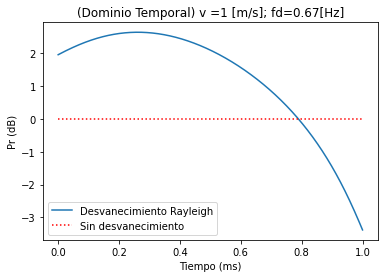

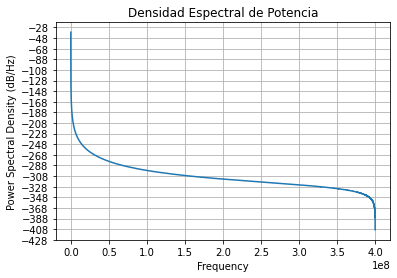

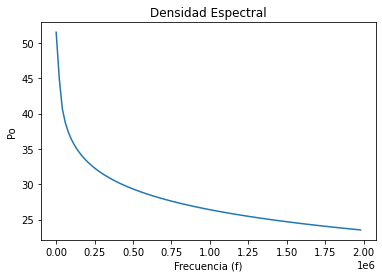

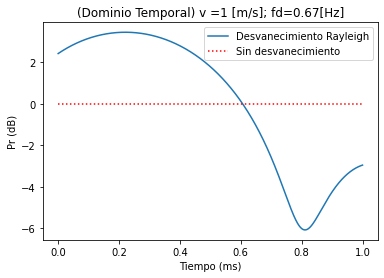

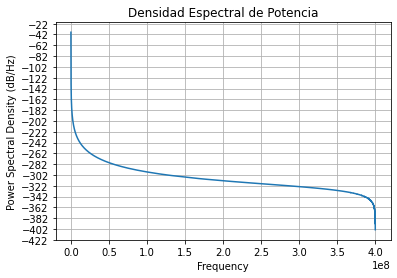

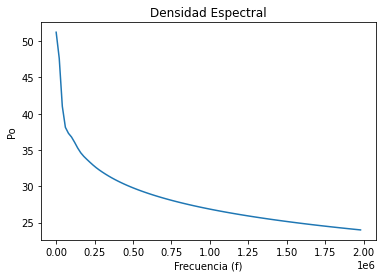

In [ ]:
print('Cambiamos las copias multicamino, con frecuencia: 500Mhz')
ray(1,200e6,1,str(1));
ray(1,200e6,50,str(1));
ray(1,200e6,100,str(1));
ray(1,200e6,150,str(1));

### Test Frecuencial

100000
100000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


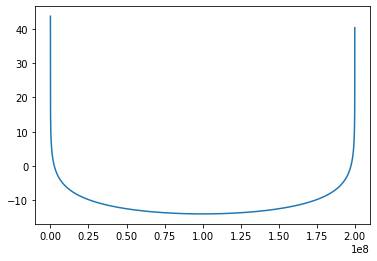

100000
100000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


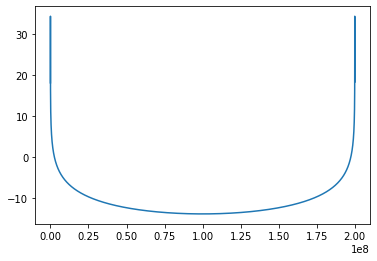

In [ ]:
def domainFrequency(v,f0,N,title):
  Fs = 1e5 # sample rate
  fd = v*f0/3e8 # maximo desplazamiento doppler
  t = np.arange(0, 1, 1/Fs) # vector de tiempo
  xr = np.zeros(len(t))
  yr = np.zeros(len(t))
  zr = np.zeros(len(t))
  
  for i in range(N):
      alpha = (np.random.rand() - 0.5) * 2 * np.pi # generacion de un angulo aleatorio
      phi = (np.random.rand() - 0.5) * 2 * np.pi # generacion de un fase aleatorio
      xr = xr + np.random.randn() * np.cos(2 * np.pi * fd * t * np.cos(alpha) + phi) # Suma de componentes xr
      yr = yr + np.random.randn() * np.sin(2 * np.pi * fd * t * np.cos(alpha) + phi) # Suma de componentes yr
      zr = zr + (xr+1j*xr)
  ## Transformada de Fourier de Cada componente

  N = len(zr)
  zr = (1/np.sqrt(N))*zr
  pp = np.array([1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0])

  for i in range(5000-1):
   pp = np.append(pp, [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]) 
  
  print(len(pp))
  print(len(zr))

  zr = zr;
  ZR = fft(zr)
  N = len(ZR)
  ZR_mag = np.abs(ZR)
  ZR_dB = 10*np.log10(ZR) 

  n = np.arange(N);
  T = N/(f0);
  freq=n/T

  plt.plot(freq,ZR_dB)
  plt.show()

domainFrequency(1,200e6,100,str(30));
domainFrequency(20,200e6,10,str(30));

### Desvanecimiento **Rician**

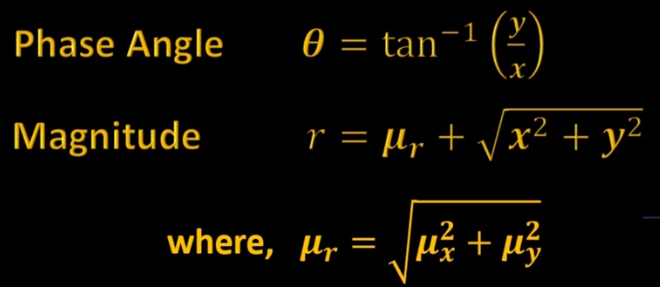

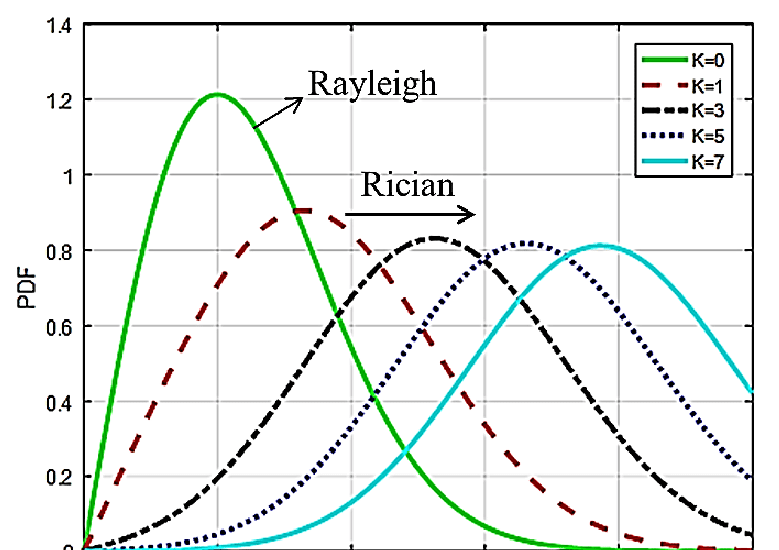

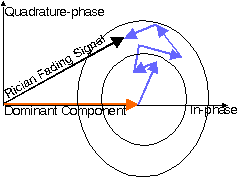

In [ ]:
def rician(v,f0,N,title):
  Fs = 1e5 # sample rate
  fd = v*f0/3e8 # maximo desplazamiento doppler
  t = np.arange(0,1, 1/Fs) # vector de tiempo
  xr = np.zeros(len(t))
  yr = np.zeros(len(t))

  for i in range(N):
      deltafrecuency = (np.random.rand() - 0.5) * 2 * np.pi # cambio de frecuencia
      phi = (np.random.rand() - 0.5) * 2 * np.pi # generacion de un fase aleatorio
      xr = xr + np.random.randn() * np.cos(2 * np.pi * fd * t * np.cos(deltafrecuency) + phi) # Suma de componentes xr
      yr = yr + np.random.randn() * np.sin(2 * np.pi * fd * t * np.cos(deltafrecuency) + phi) # Suma de componentes yr

  # Se genera un psudovector utilizando numeros complejos
  r = (1/np.sqrt(N)) * (xr + 1j*yr) # Vector Resultante NORMALIZADO
  R_mean = np.sqrt((xr.mean())**2+(yr.mean())**2)
  R = np.abs(r) + R_mean # Magnitud del numero complejo
  R_dB = 10*np.log10(R) # Magnitud en dB

  # Grafica generada
  plt.plot(t, R_dB)
  plt.plot([0, 1], [0, 0], ':r') # 0 dB
  plt.legend(['Desvanecimiento Rician', 'Sin desvanecimiento'])
  plt.title('(Dominio Temporal) v =' + title + ' [m/s]' + '; fd='+ str(round(fd,2))+'[Hz]')
  # plt.axis([0, 1, -15, 5])
  plt.xlabel('Tiempo (ms)')
  plt.ylabel('Pr (dB)')
  plt.show()

  left = 200e6 - 100e5
  rigth = 200e6 + 100e5
  plt.psd(R, NFFT=len(t), pad_to=len(t), Fs=4*f0, scale_by_freq=True)
  plt.title('Densidad Espectral de Potencia')
  # plt.axis([left, rigth, -430, -30])
  plt.show()

  rfft = fft(R)
  N = len(rfft)
  n = np.arange(N)
  # print(n)
  T = N/(10*f0)
  freq = n/T

  rfft_db = 10*np.log10(rfft)
  plt.plot(freq[0:100], np.abs(rfft_db)[0:100])
  plt.title('Densidad Espectral')
  plt.xlabel('Frecuencia (f)')
  plt.ylabel('Po')
  plt.show()

Cambiamos velocidades relativas, con frecuencia: 200MHz


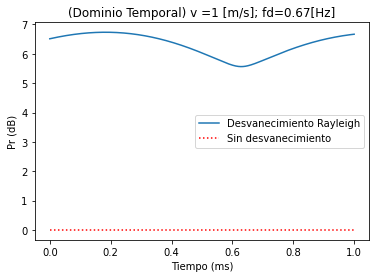

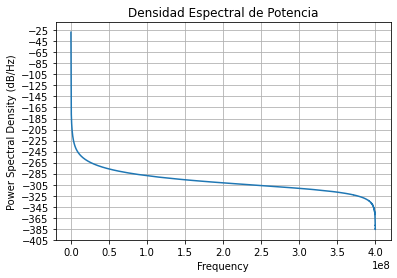

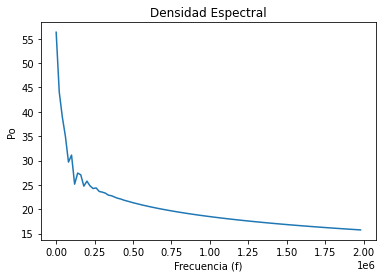

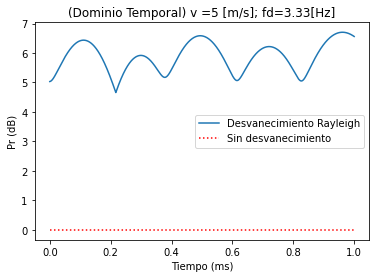

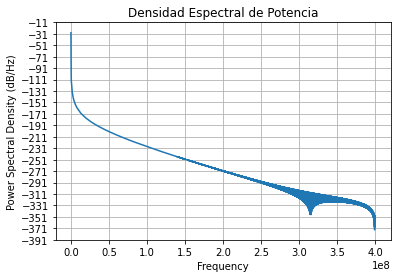

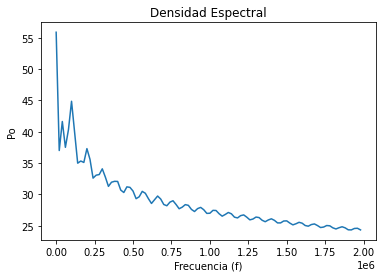

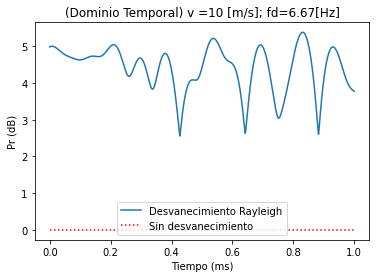

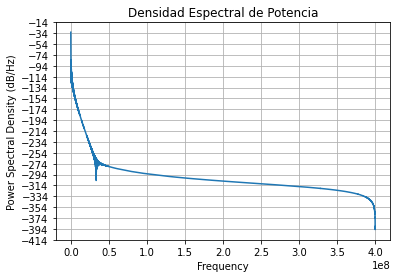

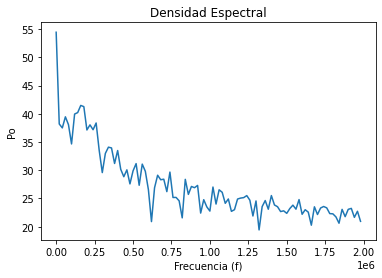

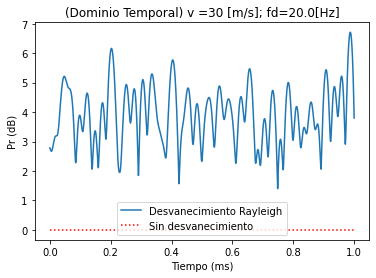

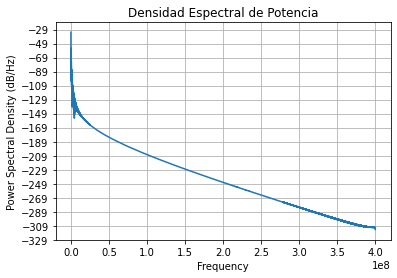

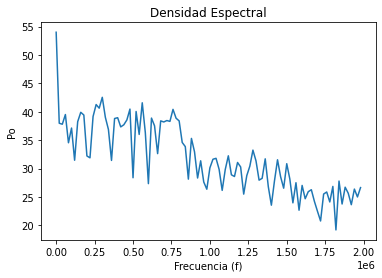

Cambiamos la frecuencia de funcionamiento, con frecuencia: 2GHz


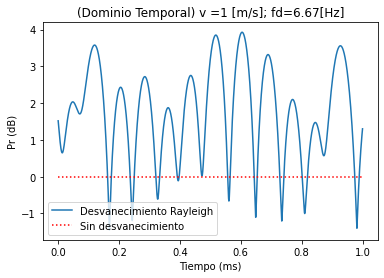

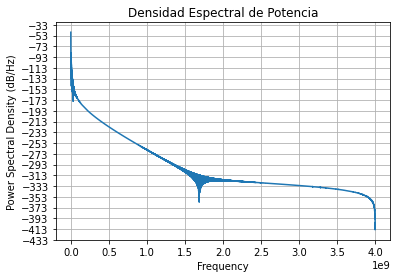

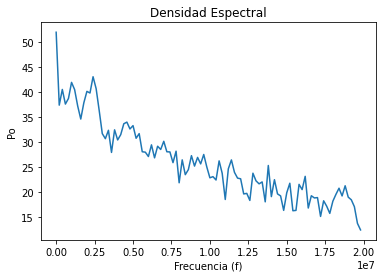

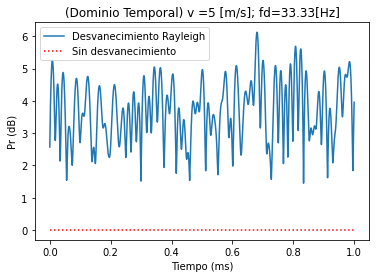

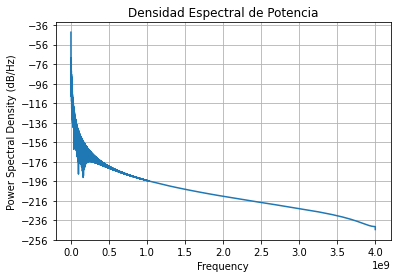

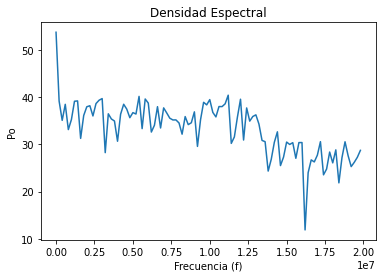

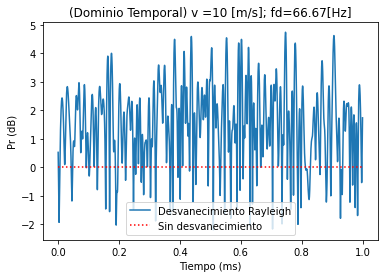

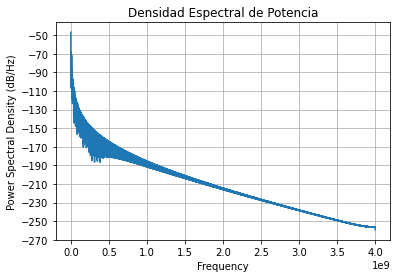

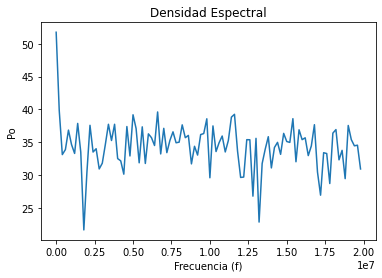

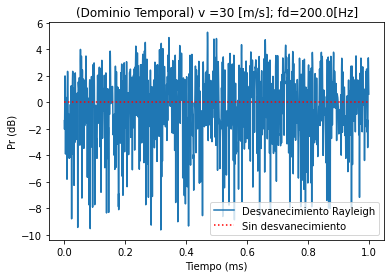

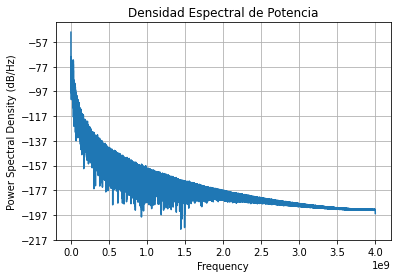

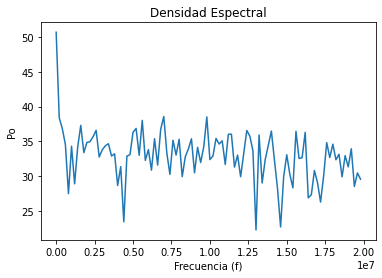

Cambiamos las copias multicamino, con frecuencia: 500Mhz


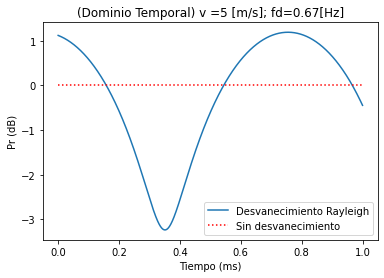

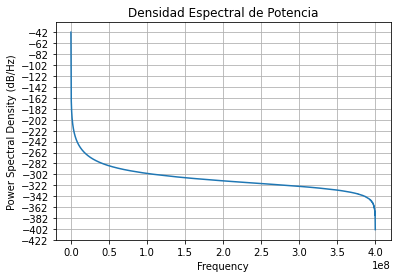

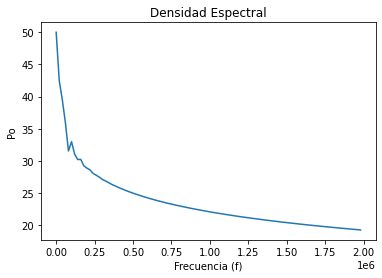

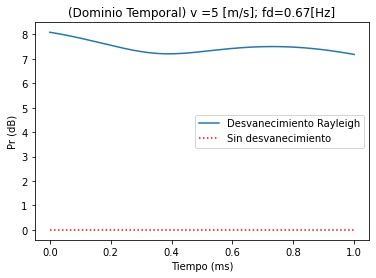

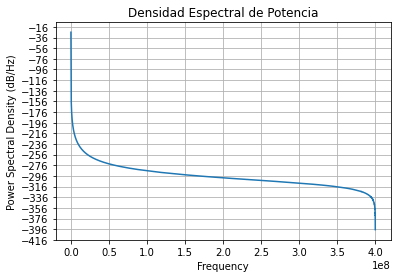

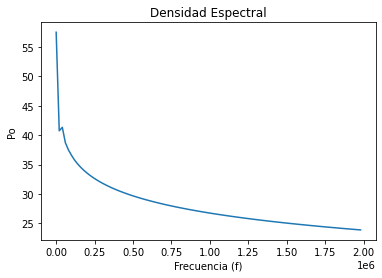

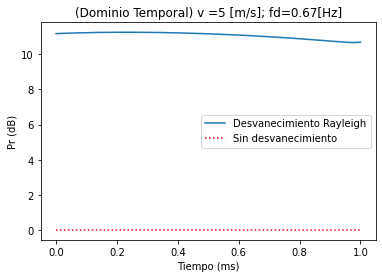

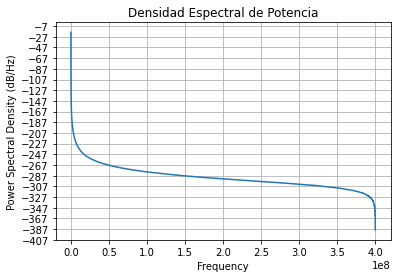

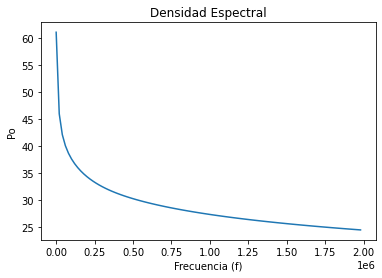

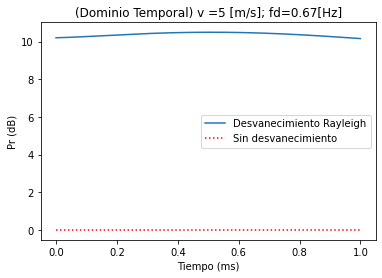

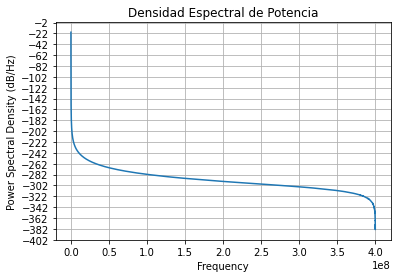

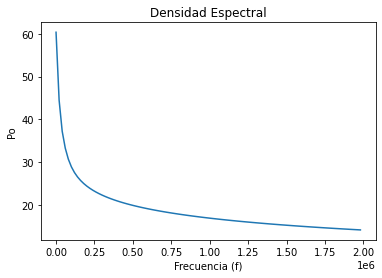

In [ ]:
# v,f0,N,title
print('Cambiamos velocidades relativas, con frecuencia: 200MHz')
rician(1,200e6,100,str(1));
rician(5,200e6,100,str(5));
rician(10,200e6,100,str(10));
rician(30,200e6,100,str(30));
print('Cambiamos la frecuencia de funcionamiento, con frecuencia: 2GHz')
rician(1,2e9,100,str(1));
rician(5,2e9,100,str(5));
rician(10,2e9,100,str(10));
rician(30,2e9,100,str(30));
print('Cambiamos las copias multicamino, con frecuencia: 500Mhz')
rician(1,200e6,1,str(5));
rician(1,200e6,50,str(5));
rician(1,200e6,100,str(5));
rician(1,200e6,150,str(5));